In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from datetime import datetime


In [3]:
ks = pd.read_csv('ks-projects-201801.csv')

In [4]:
tec = ks[ks['main_category'] == 'Technology']

In [5]:
tecl = tec['launched'].astype('datetime64[ns]').dt.date

In [6]:
tecd = tec['deadline'].astype('datetime64[ns]').dt.date

In [11]:
df3 = pd.DataFrame({'backers':tec['backers'],'Duration': (abs(tecd-tecl)).dt.days})

<class 'numpy.int64'>


In [ ]:
#sns_plot = sns.jointplot(data=df3, x='backers', y='Duration', kind='kde')
#sns_plot.savefig("output.png")

In [13]:
tecsuc = tec[tec['state'] == 'successful']

In [14]:
tecfailed = tec[tec['state'] == 'failed']

In [15]:
df4 = pd.DataFrame({'backers': tecfailed['backers'],'Duration': (abs(tecd-tecl)).dt.days})

In [16]:
#sns_plot1 = sns.jointplot(data=df4, x='backers', y='Duration', kind='kde', color='orchid' )
#sns_plot1.savefig("fail.png")

In [17]:
df5 = pd.DataFrame({'backers': tecsuc['backers'],'Duration': (abs(tecd-tecl)).dt.days})

In [18]:
#sns_plot2 = sns.jointplot(data=df5, x='backers', y='Duration', kind='kde', color='teal' )
#sns_plot1.savefig("success.png")

In [ ]:
plt.hist([tecfailed['backers']], color='orchid', range=(0,300), alpha=0.6)
plt.hist([tecsuc['backers']], color='teal', range=(0,300), alpha=0.6)
plt.xlabel('Backers')
plt.ylabel('Campaigns')
plt.show()

In [21]:
tfe = tecfailed[tecfailed['backers'] >= 100]

In [23]:
tfe1 = tfe[tfe['usd_goal_real'] <= 100000]

In [24]:
df6 = pd.DataFrame({'Backers': tfe1['backers'],'Goal': tfe1['usd_goal_real']})

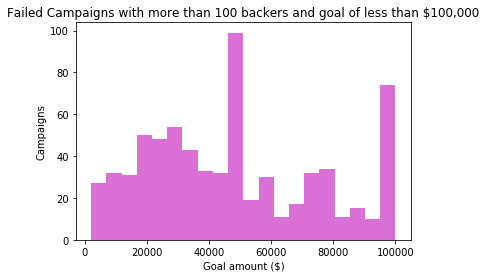

In [26]:
plt.hist([df6['Goal']], color='orchid', bins=20)
plt.xlabel('Goal amount ($)')
plt.title('Failed Campaigns with more than 100 backers and goal of less than $100,000')
plt.ylabel('Campaigns')
plt.show()

In [27]:
tse = tecsuc[tecsuc['backers'] >= 1]
tse1 = tse[tse['usd_goal_real'] <= 100000]
df7 = pd.DataFrame({'Backers': tse1['backers'],'Goal': tse1['usd_goal_real']})

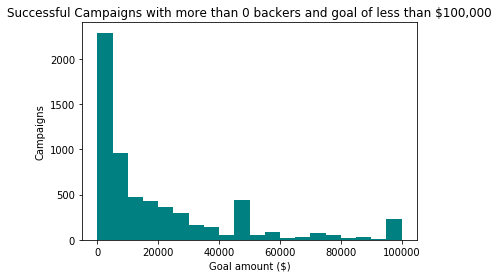

In [29]:
plt.hist([df7['Goal']], color='teal', bins=20)
plt.xlabel('Goal amount ($)')
plt.title('Successful Campaigns with more than 0 backers and goal of less than $100,000')
plt.ylabel('Campaigns')
plt.show()

Text(0, 0.5, 'Campaigns')

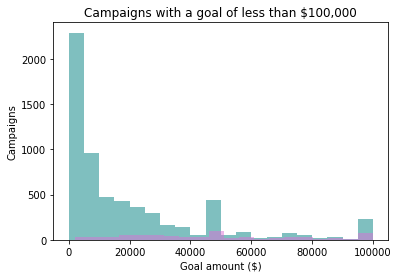

In [32]:
plt.hist([df7['Goal']], color='teal', bins=20, alpha=0.5)
plt.hist([df6['Goal']], color='orchid', bins=20, alpha=0.5)

plt.xlabel('Goal amount ($)')
plt.title('Campaigns with a goal of less than $100,000')
plt.ylabel('Campaigns')

In [33]:
tg = [tecsuc['usd_goal_real']]
np.percentile(tg, 5)

497.3225000000003

In [216]:
#category issssss.....
c =  ks[ks['state'] == 'successful']
#dance, theater, comics
c = c[c['main_category'] != 'Music']
c = c[c['main_category'] != 'Food']
c = c[c['main_category'] != 'Fashion']
c = c[c['main_category'] != 'Games']
c = c[c['main_category'] != 'Film & Video']
c = c[c['main_category'] != 'Design']
c = c[c['main_category'] != 'Photography']
c = c[c['main_category'] != 'Art']
c = c[c['main_category'] != 'Crafts']
c = c[c['main_category'] != 'Journalism']
c = c[c['main_category'] != 'Photography']
c = c[c['main_category'] != 'Publishing']
c = c[c['main_category'] != 'Theater']
c = c[c['main_category'] != 'Comics']

In [217]:
tsn = pd.DataFrame({'main_category': c['main_category'],
    'Goal': c['usd_goal_real'],
       'Pledged':c['usd_pledged_real'], 
       'Difference': (c['usd_pledged_real']-c['usd_goal_real']) })

In [218]:
tsn.head()

,main_category,Goal,Pledged,Difference
154,Technology,250000.00,268192.00,18192.00
187,Technology,64074.84,75379.02,11304.18
194,Technology,2658.03,2739.22,81.19
233,Dance,1200.00,1205.00,5.00
244,Technology,5000.00,5000.00,0.00


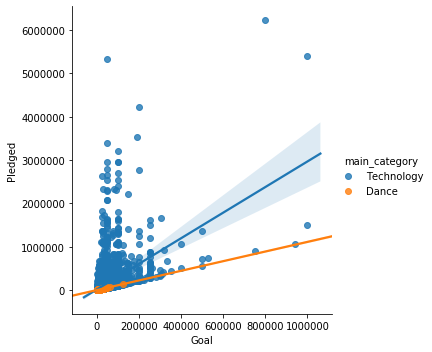

In [219]:
sns.lmplot(data=tsn, x='Goal', y='Pledged', hue='main_category')